In [81]:
import numpy 
import pandas as pd
from numpy import arange
from numpy import set_printoptions
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

sns.set(rc={'figure.figsize':(16,9)})


In [82]:
filename = 'housing.csv'
names = [' CRIM ', ' ZN ', ' INDUS ', ' CHAS ', ' NOX ', ' RM ', ' AGE ', ' DIS ', ' RAD ', ' TAX ', ' PTRATIO ',
         ' B ', ' LSTAT ', ' MEDV ']
dataset = read_csv(filename, skipinitialspace=True, delim_whitespace=True, names=names)
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [83]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0    CRIM      506 non-null    float64
 1    ZN        506 non-null    float64
 2    INDUS     506 non-null    float64
 3    CHAS      506 non-null    int64  
 4    NOX       506 non-null    float64
 5    RM        506 non-null    float64
 6    AGE       506 non-null    float64
 7    DIS       506 non-null    float64
 8    RAD       506 non-null    int64  
 9    TAX       506 non-null    float64
 10   PTRATIO   506 non-null    float64
 11   B         506 non-null    float64
 12   LSTAT     506 non-null    float64
 13   MEDV      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [84]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [85]:
dataset[dataset.columns].isna().sum()

 CRIM        0
 ZN          0
 INDUS       0
 CHAS        0
 NOX         0
 RM          0
 AGE         0
 DIS         0
 RAD         0
 TAX         0
 PTRATIO     0
 B           0
 LSTAT       0
 MEDV        0
dtype: int64

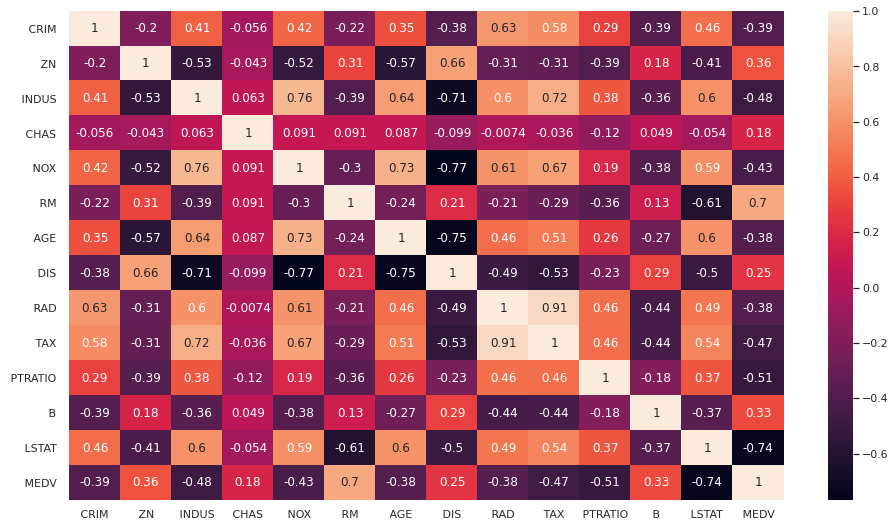

In [86]:
corr_matrix = dataset.corr()
_=sns.heatmap(data=corr_matrix, annot=True)

In [87]:
arr = dataset.values
X = arr[:, 0:13]
Y = arr[:, 13]

In [88]:
arr

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [89]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaledX = scaler.fit_transform(X)
set_printoptions(precision=6)
scaledX[0:1, :]

array([[0.      , 0.18    , 0.067815, 0.      , 0.314815, 0.577505,
        0.641607, 0.269203, 0.      , 0.208015, 0.287234, 1.      ,
        0.08968 ]])

In [90]:
scaledX

array([[0.000000e+00, 1.800000e-01, 6.781525e-02, ..., 2.872340e-01,
        1.000000e+00, 8.967991e-02],
       [2.359225e-04, 0.000000e+00, 2.423021e-01, ..., 5.531915e-01,
        1.000000e+00, 2.044702e-01],
       [2.356977e-04, 0.000000e+00, 2.423021e-01, ..., 5.531915e-01,
        9.897373e-01, 6.346578e-02],
       ...,
       [6.118925e-04, 0.000000e+00, 4.204545e-01, ..., 8.936170e-01,
        1.000000e+00, 1.078918e-01],
       [1.160730e-03, 0.000000e+00, 4.204545e-01, ..., 8.936170e-01,
        9.913006e-01, 1.310706e-01],
       [4.618417e-04, 0.000000e+00, 4.204545e-01, ..., 8.936170e-01,
        1.000000e+00, 1.697020e-01]])

In [91]:
scaledX.shape

(506, 13)

In [92]:
validation_size = 0.15
seed = 42
X_train, X_validation, Y_train, Y_validation = train_test_split(scaledX, Y,
                                                                test_size=validation_size, random_state=seed)

In [93]:
seed = 42
scoring = 'r2'
num_folds = 5

In [94]:
models = []
models.append((' CART ', DecisionTreeRegressor()))
models.append((' EN ', ElasticNet()))
models.append((' LR ', LinearRegression()))
models.append((' LASSO ', Lasso()))
models.append((' KNN ', KNeighborsRegressor()))
models.append((' SVR ', SVR()))

In [95]:
results = []
model_names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    model_names.append(name)
    print('{}   : {} ({})'.format(name,cv_results.mean(),cv_results.std()))

 CART    : 0.7173385277228306 (0.09266003098640588)
 EN    : 0.14933310467295693 (0.026331370075219396)
 LR    : 0.6937842540436945 (0.05408677173376747)
 LASSO    : 0.24110085526004035 (0.04866166613567407)
 KNN    : 0.6213886796011623 (0.10771989777808508)
 SVR    : 0.567737039642475 (0.06916462327585408)


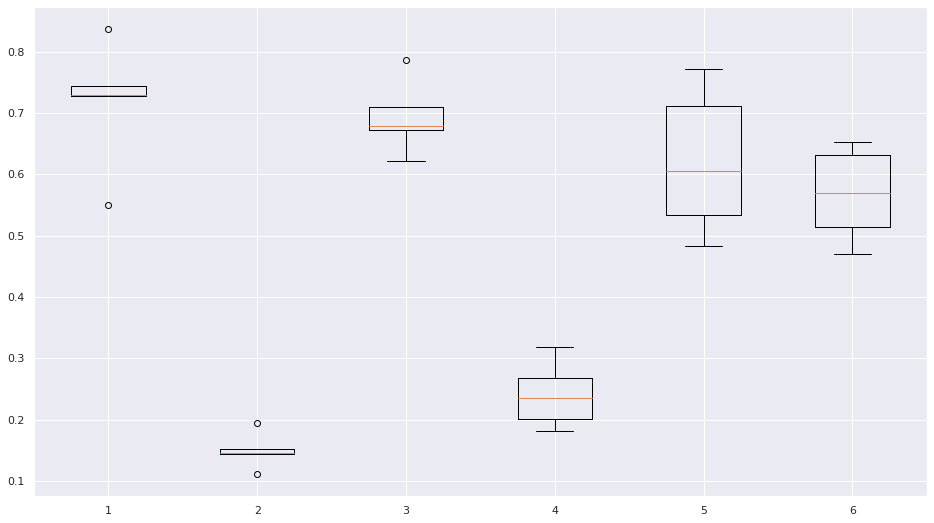

In [96]:
fig = pyplot.figure()
pyplot.boxplot(results)
pyplot.show()

In [97]:
#so CART is the best model for here

In [98]:
model = DecisionTreeRegressor(max_depth=15)
model.fit(X_train, Y_train)

predictions = model.predict(X_validation)

In [99]:
r2_score(Y_validation, predictions)

0.601206124130025

In [100]:
depths=[i for i in range(10,25)]
res=[]
for depth in range(10,25):
  mod=DecisionTreeRegressor(max_depth=depth)
  cv_results = cross_val_score(
        mod, X_train, Y_train, cv=kfold, scoring=scoring)
  res.append(cv_results.mean())


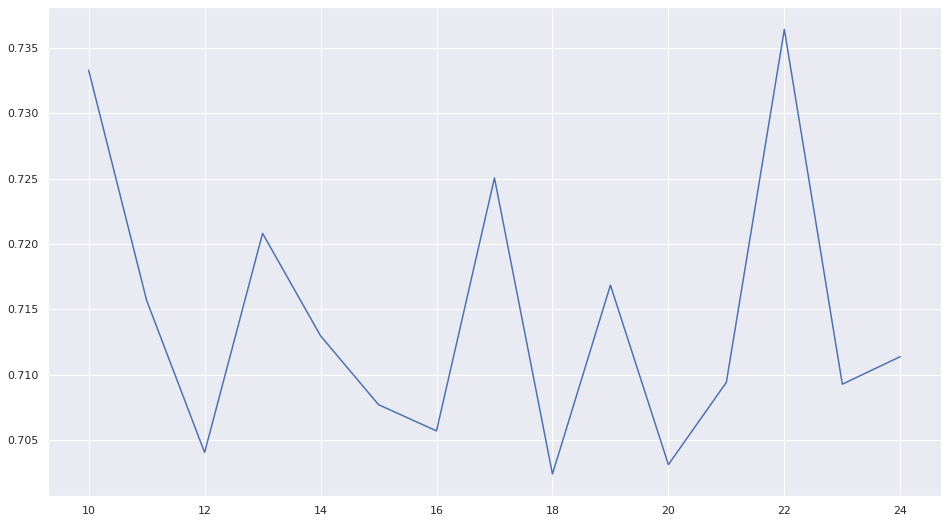

In [101]:
_=sns.lineplot(x=depths,y=res)

In [102]:
model = DecisionTreeRegressor(max_depth=15)
model.fit(X_train, Y_train)

predictions = model.predict(X_validation)

In [103]:
r2_score(Y_validation, predictions)

0.8566458067555544